In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
from scipy.optimize import newton

def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

In [70]:
inp_df = pd.read_csv("round-5-island-data-bottle/trades_round_4_day_1_wn.csv",delimiter=";")
inp_df2 = pd.read_csv("round-5-island-data-bottle/trades_round_4_day_2_wn.csv",delimiter=";")
inp_df3 = pd.read_csv("round-5-island-data-bottle/trades_round_4_day_3_wn.csv",delimiter=";")
price_df = pd.read_csv("round-4-island-data-bottle/prices_round_4_day_1.csv",delimiter=";")
price_df2 = pd.read_csv("round-4-island-data-bottle/prices_round_4_day_2.csv",delimiter=";")
price_df3 = pd.read_csv("round-4-island-data-bottle/prices_round_4_day_3.csv",delimiter=";")
prices_am1 = pd.DataFrame(price_df[price_df["product"] == "COCONUT_COUPON"]).reset_index(drop = True)
prices_am2 = pd.DataFrame(price_df2[price_df2["product"] == "COCONUT_COUPON"]).reset_index(drop = True)
prices_am3 = pd.DataFrame(price_df3[price_df3["product"] == "COCONUT_COUPON"]).reset_index(drop = True)
prices_str1 = pd.DataFrame(price_df[price_df["product"] == "COCONUT"]).reset_index(drop = True)
prices_str2 = pd.DataFrame(price_df2[price_df2["product"] == "COCONUT"]).reset_index(drop = True)
prices_str3 = pd.DataFrame(price_df3[price_df3["product"] == "COCONUT"]).reset_index(drop = True)
df1_am = pd.DataFrame(inp_df[inp_df["symbol"] == "COCONUT_COUPON"]).reset_index(drop=True)
df2_am = pd.DataFrame(inp_df2[inp_df2["symbol"] == "COCONUT_COUPON"]).reset_index(drop=True)
df3_am = pd.DataFrame(inp_df3[inp_df3["symbol"] == "COCONUT_COUPON"]).reset_index(drop=True)
df1_str = pd.DataFrame(inp_df[inp_df["symbol"] == "COCONUT"]).reset_index(drop=True)
df2_str = pd.DataFrame(inp_df2[inp_df2["symbol"] == "COCONUT"]).reset_index(drop=True)
df3_str = pd.DataFrame(inp_df3[inp_df3["symbol"] == "COCONUT"]).reset_index(drop=True)
trades_am = pd.concat([df1_am,df2_am,df3_am], axis= 0, ignore_index=True)
trades_str = pd.concat([df1_str,df2_str,df3_str], axis= 0, ignore_index=True)
prices_am = pd.concat([prices_am1,prices_am2,prices_am3], axis= 0, ignore_index=True)
prices_str = pd.concat([prices_str1,prices_str2,prices_str3], axis= 0, ignore_index=True)

In [117]:
df1_str.buyer.value_counts(), df1_str.seller.value_counts()

(Vinnie     530
 Raj         78
 Rhianna     60
 Name: buyer, dtype: int64,
 Vinnie     526
 Raj         76
 Rhianna     66
 Name: seller, dtype: int64)

In [191]:
df1_str[df1_str.buyer == df1_str.seller]

,timestamp,buyer,seller,symbol,currency,price,quantity
0,5200,Vinnie,Vinnie,COCONUT,SEASHELLS,9997.0,8
2,10900,Vinnie,Vinnie,COCONUT,SEASHELLS,10007.0,10
4,14900,Vinnie,Vinnie,COCONUT,SEASHELLS,10004.0,10
5,16000,Vinnie,Vinnie,COCONUT,SEASHELLS,10001.0,8
6,16200,Vinnie,Vinnie,COCONUT,SEASHELLS,10000.0,10
...,...,...,...,...,...,...,...
662,992300,Vinnie,Vinnie,COCONUT,SEASHELLS,10126.0,5
663,992900,Vinnie,Vinnie,COCONUT,SEASHELLS,10120.0,6
664,996600,Vinnie,Vinnie,COCONUT,SEASHELLS,10127.0,9
666,997100,Vinnie,Vinnie,COCONUT,SEASHELLS,10126.0,6


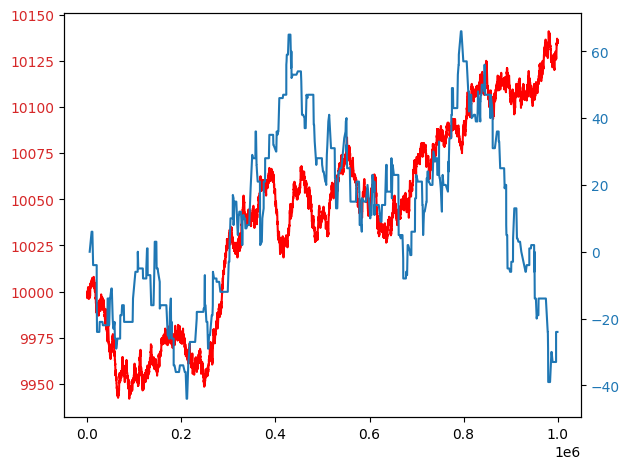

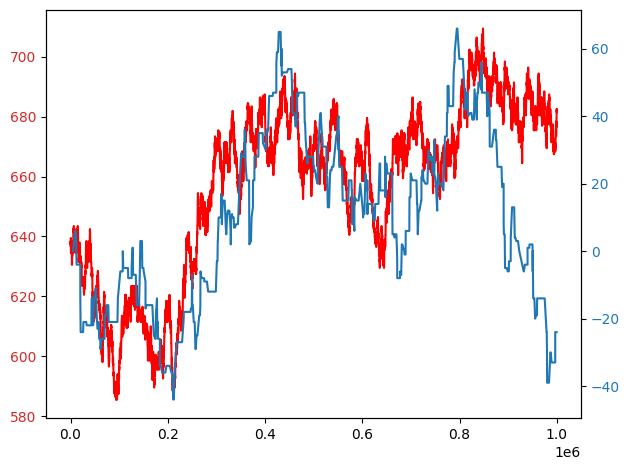

In [136]:
ddd = df1_str
ppp = prices_str1
aaa = prices_am1
n = ddd.shape[0]
d = {'time': list(ddd.timestamp), 'Vinnie':[0]*n, 'Raj':[0]*n, 'Rhianna':[0]*n}
for i, row in ddd.iterrows():
    for name in d:
        if name == row.buyer == row.seller:
            #continue
            d[name][i] = d[name][i-1]
        else:
            if name == row.buyer:
                d[name][i] = d[name][i-1] + row.quantity
            elif name == row.seller:
                d[name][i] = d[name][i-1] - row.quantity
            else:
                if name != 'time':
                    d[name][i] = d[name][i-1]
pos = pd.DataFrame(d)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(ppp.timestamp, ppp.mid_price, color = 'red')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.plot(pos.time, pos.Rhianna + pos.Raj)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(aaa.timestamp, aaa.mid_price, color = 'red')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.plot(pos.time, pos.Rhianna + pos.Raj)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

In [146]:
temp1 = prices_str1[['timestamp', 'mid_price']].rename(columns ={'timestamp':'time', 'mid_price':'mid_price_coconut'})
temp2 = prices_am1[['timestamp', 'mid_price']].rename(columns ={'timestamp':'time', 'mid_price':'mid_price_option'})

X = pd.merge(temp1, temp2, on='time', how='inner')
X

,time,mid_price_coconut,mid_price_option
0,0,10000.0,637.5
1,100,9999.5,637.5
2,200,9998.5,637.5
3,300,9999.5,638.5
4,400,9998.5,637.5
...,...,...,...
9995,999500,10135.5,681.5
9996,999600,10136.5,682.5
9997,999700,10134.5,681.5
9998,999800,10135.0,681.5


In [160]:
def bs_call(S, K, r, sigma, T):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

final = pd.merge_asof(X, pos[['time', 'Vinnie']], on='time', direction='backward').fillna(0)
def calculate_call_price(row):
    S = row['mid_price_coconut']
    K = 10000
    r = 0
    T = (250_000_000 - row['time']) / 252_000_000
    implied_vol = 0.16063937134736464  # Implied volatility, adjust as needed
    call_price = bs_call(S, K, r, implied_vol, T)
    return call_price

final['Call_Price'] = final.apply(calculate_call_price, axis=1)

0       637.630000
1       637.363963
2       636.832203
3       637.363709
4       636.831948
           ...    
9995    710.687671
9996    711.252850
9997    710.122353
9998    710.404726
9999    710.404598
Name: Call_Price, Length: 10000, dtype: float64

In [185]:
final['shifted'] = final['Call_Price'].shift(-1)
final['pos_diff'] = final.Vinnie.diff(1)
final

,time,mid_price_coconut,mid_price_option,Vinnie,Call_Price,shifted,Pos_diff,pos_diff
0,0,10000.0,637.5,0.0,637.630000,637.363963,NaN,NaN
1,100,9999.5,637.5,0.0,637.363963,636.832203,0.0,0.0
2,200,9998.5,637.5,0.0,636.832203,637.363709,0.0,0.0
3,300,9999.5,638.5,0.0,637.363709,636.831948,0.0,0.0
4,400,9998.5,637.5,0.0,636.831948,635.769301,0.0,0.0
...,...,...,...,...,...,...,...,...
9995,999500,10135.5,681.5,24.0,710.687671,711.252850,0.0,0.0
9996,999600,10136.5,682.5,24.0,711.252850,710.122353,0.0,0.0
9997,999700,10134.5,681.5,24.0,710.122353,710.404726,0.0,0.0
9998,999800,10135.0,681.5,24.0,710.404726,710.404598,0.0,0.0


<Axes: >

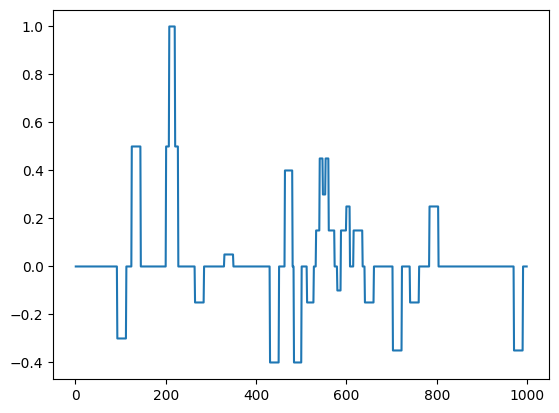

In [190]:
final[final.time < 100000].pos_diff.rolling(window=20, min_periods=1).mean().plot()

In [166]:
import statsmodels.api as sm
temp = final.dropna()

X = sm.add_constant(temp[['Vinnie', 'mid_price_option']])  # Add a constant term to the predictor
model = sm.OLS(temp['shifted'], X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                shifted   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                 1.878e+04
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:18:02   Log-Likelihood:                -39836.
No. Observations:                9999   AIC:                         7.968e+04
Df Residuals:                    9996   BIC:                         7.970e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               40.5679      3.896     10.414      0.000      32.932      48.204
Vinnie               0.1230      0.007     18.318      0.000       0.110       0.136
mid_price_option     0.9435      0.006    157.414      0.000       0.932       0.955
==============================================================================
Omnibus:                      173.492   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.769
Skew:                          -0.094   Prob(JB):                     1.08e-23
Kurtosis:                       2.533   Cond. No.                     1.97e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: >

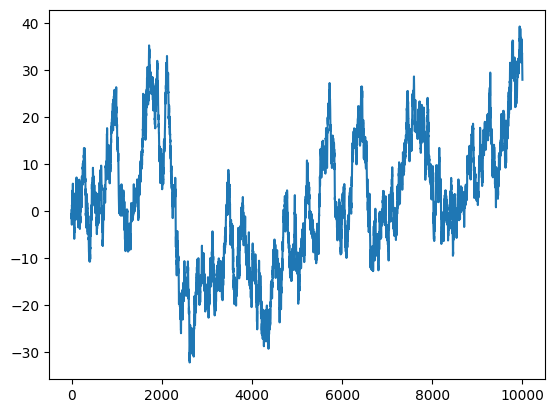

In [171]:
(final.Call_Price - final.mid_price_option).plot()
# model.predict(X)

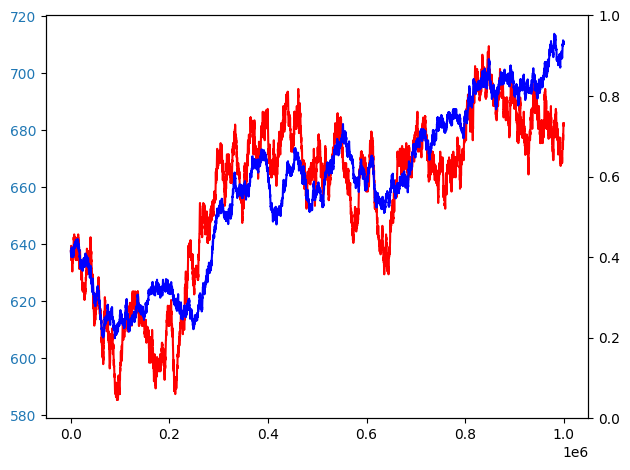

In [173]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(final.time, final.mid_price_option, color = 'red')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax1.plot(final.time, final.Call_Price, color = 'blue')
ax1.tick_params(axis='y', labelcolor=color)
#ax2.plot(final.time, final.Vinnie)
#ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()